# 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

#### 데이터 불러오기

In [2]:
covid = pd.read_csv("owid-covid-data.csv")
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


#### OWID로 시작하는 나라들 제거 및 수정

In [3]:
covid = covid.query("iso_code not in  ['OWID_AFR', 'OWID_EUR', 'OWID_EUN', 'OWID_INT', 'OWID_NAM', 'OWID_OCE', 'OWID_SAM', 'OWID_WRL']")
covid['iso_code'] = covid['iso_code'].replace(['OWID_KOS'],'XKX')

#### '년+월' 컬럼추가 ex) 202002

In [4]:
covid["date"] = pd.to_datetime(covid["date"])
covid["year_month"] = covid["date"].dt.strftime("%Y%m")
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,year_month
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,202002
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,202002
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,202002
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,202002
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,202002


#### 데이터수가 적은 국가 삭제

In [5]:
covid['location'].value_counts()

Mexico                             565
Argentina                          565
Thailand                           562
Peru                               560
Taiwan                             550
                                  ... 
Cook Islands                        36
Niue                                16
Pitcairn                             7
Bonaire Sint Eustatius and Saba      1
Turkmenistan                         1
Name: location, Length: 223, dtype: int64

In [6]:
location_groupby = covid.groupby('location').mean()
pd.set_option('display.float_format', '{:.2f}'.format) # 항상 float 형식으로

In [7]:
# 확진자 수 데이터가 아예 없는 국가들, 50개보다 적은 데이터가 있는 국가들은 분석에서 제외하자.
# 50개보다 적은 데이터가 있는 국가들은 'Cook Islands', 'Niue', 'Pitcairn', 'Bonaire Sint Eustatius and Saba', 'Turkmenistan'

# 확진자 수 데이터가 아예 없는 국가들 확인
nodata = pd.DataFrame(location_groupby['total_cases'].isnull())
nodata = nodata.astype(str)
nodata = nodata[nodata['total_cases'] == 'True']
nodata = pd.DataFrame(nodata)
nodata.reset_index(level=['location'], inplace = True)
x=  nodata['location'].unique()
for i in x:
  covid19 = covid[covid['location'] != i]

del covid

In [8]:
x

array(['Anguilla', 'Aruba', 'Bermuda', 'Bonaire Sint Eustatius and Saba',
       'British Virgin Islands', 'Cayman Islands', 'Cook Islands',
       'Curacao', 'Faeroe Islands', 'Falkland Islands',
       'French Polynesia', 'Gibraltar', 'Greenland', 'Guernsey',
       'Isle of Man', 'Jersey', 'Macao', 'Montserrat', 'Nauru',
       'New Caledonia', 'Niue', 'Northern Cyprus', 'Pitcairn',
       'Saint Helena', 'Sint Maarten (Dutch part)', 'Tonga',
       'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu',
       'Wallis and Futuna'], dtype=object)

# GDP(PPP)

#### 원자료에서는 GDP(PPP)값이 고정되어 있어서 2019, 2020년도 GDP(PPP)값을 새로 가져와서 성장률 계산했음
#### 이 값은 코로나 시대이후의 성장률임
#### 코로나 시대 이전의 성장률을 계산하여 이와 비교해 얼마나 성장률이 하락했는지를 확인하여
#### 그 값이 작을수록 코로나에도 불구하고 경제가 비교적 안정적이라고 판단할 수 있다.

gdp_g.csv 출처 : https://data.worldbank.org/indicator/NY.GDP.PCAP.KD.ZG

In [9]:
gdp_g = pd.read_csv("gdp_g.csv")
gdp_g
gdp_g.dropna(subset=['Country Code', '2019', '2020'], inplace = True)
gdp_g.drop(['Country Name'], axis = 1, inplace = True)
gdp_g
covid19 = pd.merge(covid19, gdp_g, left_on='iso_code', right_on='Country Code', how='inner')
covid19.drop(['Country Code'], axis = 1, inplace= True)
covid19['GDP_g_diff'] = covid19['2020'] - covid19['2019']

##### columns
##### 2019 : 2019년 경제성장률
##### 2020 : 2020년 경제성장률 
##### GDP_g_diff: 2020년 경제성장률 - 2019년 경제성장률

In [10]:
current_gdp = pd.read_csv("WEO_Data.csv")
current_gdp.dropna(subset=['Country', '2019_num', '2020_num'], inplace = True)
current_gdp.drop(['Subject Descriptor', 'Units', 'Scale', 'Estimates Start After'], axis = 1, inplace = True)
covid19 = pd.merge(covid19, current_gdp, left_on='location', right_on='Country', how='inner')
covid19.drop(['Country'], axis = 1, inplace= True)
covid19['2019_num'] = pd.to_numeric(covid19['2019_num'].map(lambda x:x.replace(',','')))
covid19['2020_num'] = pd.to_numeric(covid19['2020_num'].map(lambda x:x.replace(',','')))

한국 있어요!!

In [11]:
covid19.query("location == 'South Korea'").head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,year_month,2019,2020,GDP_g_diff,2019_num,2020_num
65277,KOR,Asia,South Korea,2020-01-21,nan,nan,nan,nan,nan,nan,...,12.27,83.03,0.92,nan,202001,1.84,-1.09,-2.93,2304.83,2310.43


-----------------------------------------------------------------------
### 여기서 부터 안민용 분석

In [12]:
covid = covid19.reindex([
 'location',
 'date',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
    'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients_per_million',
 'hosp_patients_per_million',
'total_deaths',
    'total_cases',
    'positive_rate',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed_per_thousand',
 'tests_units',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'stringency_index',
 'population_density',
 'median_age',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'human_development_index',
    'excess_mortality',
'year_month',
'2019',
'2020',
    '2019_num',
    '2020_num',
'GDP_g_diff'], axis=1)

얼추 쓸꺼같은 컬럼들만 놨는데 혹시나 걸리적거리면 여기서 지우시면 되겠습니다!

# 선진국, 선진국 아닌 국가들 분류

### 국가 이름 공백 제거 및 마무리 전처리

In [13]:
covid['location'] = covid['location'].str.replace(' ', '_')

#### 나라별 데이터프레임을 따로 만들기

In [14]:
y = covid['location'].unique().tolist()

for i in y:
  globals()['{}'.format(i)] = covid[covid['location'] == i ]

In [15]:
United_States.head(1)

,location,date,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,...,handwashing_facilities,hospital_beds_per_thousand,human_development_index,excess_mortality,year_month,2019,2020,2019_num,2020_num,GDP_g_diff
73986,United_States,2020-01-22,0.00,nan,nan,nan,nan,nan,nan,nan,...,nan,2.77,0.93,nan,202001,1.70,-3.82,21433.23,20932.75,-5.52


## HDI기준 정렬

In [16]:
# hdi 수치 없는 나라 제거
covid = covid.dropna(subset = ['human_development_index', 'new_deaths_per_million', 'total_deaths',
    'total_cases',])

### 사망률 (total death / total_case) (전체 코로나 확진 건당 전체 사망수) column 추가

In [17]:
covid['death_rate'] = covid['total_deaths'] /covid['total_cases'] * 100 

### hdi 있는 국가 중에서 침대수, 사망자수, 확진자수, 중환자수, 검사수, 백신 투여수 없는 나라들 제거

In [18]:
temp = covid
temp = temp.dropna(subset = ['hospital_beds_per_thousand', 'new_deaths_per_million',
                            'total_tests_per_thousand', 'people_vaccinated_per_hundred'])
temp = temp.drop_duplicates(['location'], keep = 'last')
temp.sort_values(by=['human_development_index'],axis=0, inplace= True)

In [19]:
#하위 5국가
low_HDI_5 = temp.head(5).location.tolist()
low_HDI_20 = temp.head(20).location.tolist()
temp.sort_values(by=['human_development_index'],axis=0, inplace= True, ascending = False)
high_HDI_20 = temp.head(20).location.tolist()

In [20]:
high_HDI_20 = ['Norway',
'Ireland',
 'Switzerland',
 'Iceland',
 'Germany',
 'Australia',
 'Netherlands',
 'Denmark',
'Singapore',
 'Finland',
 'United_Kingdom',
 'New_Zealand',
 'Belgium',
 'Canada',
 'United_States',
 'Austria',
 'Israel',
 'Slovenia',
'South_Korea',
 'Luxembourg']

In [21]:
#상위 5국가 (미리 고른거 기준!)
high_HDI_5 = ['United_States','South_Korea','Germany','United_Kingdom','Canada']
del temp

# 데이터 분석 및 시각화

In [22]:
order = [high_HDI_20, low_HDI_20]

## hdi에 따른 사망률

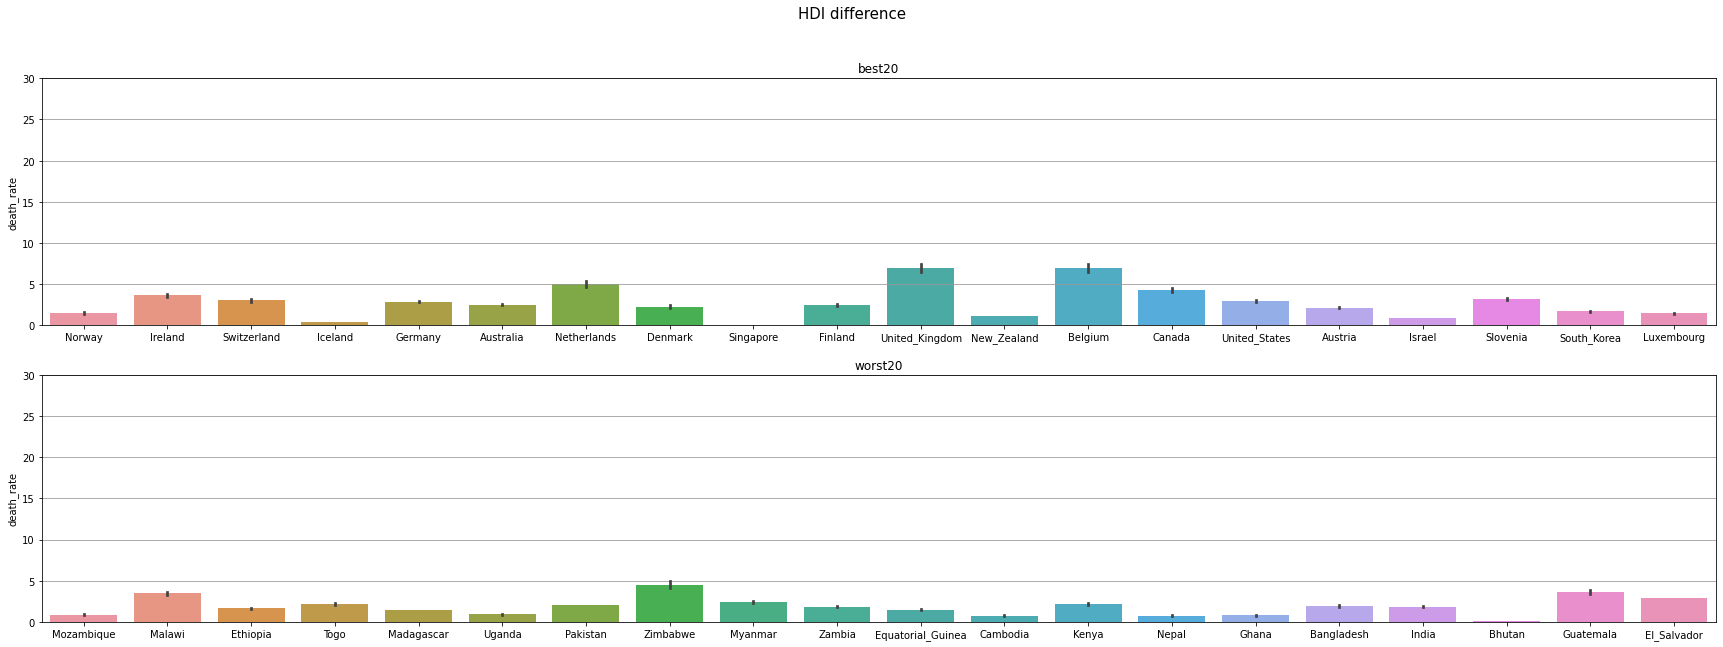

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(30,10))
mydata = [covid.query("location in @high_HDI_20"), covid.query("location in @low_HDI_20")]
colors = ['r','b']
name = ['best20','worst20']

for i,ax in enumerate(axes.reshape(-1)): 
 
    sns.barplot(ax=ax, data=mydata[i], x='location', y='death_rate', order = order[i]).set(xlabel='')
    ax.set_facecolor('white')
    ax.grid(b=True, color='#999999',axis='y')
    ax.set_title(name[i], loc='center')
    ax.axis(ymin = 0, ymax = 30)
fig.suptitle('HDI difference', size = 15)
plt.show()

----------------------------------------------------------------------------
##### HDI가 높은 나라일수록 사망률이 높은 경향을 보임!!!!


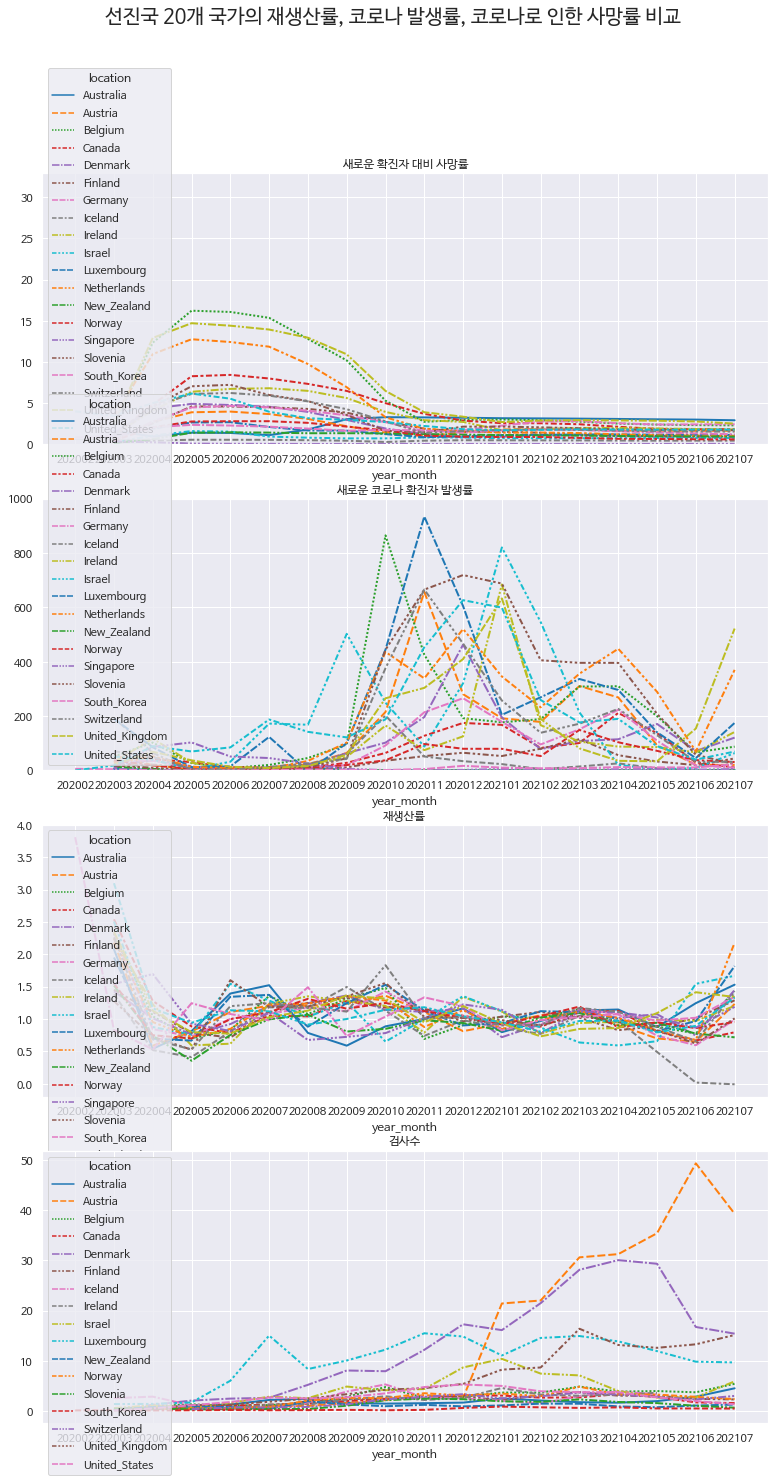

In [24]:
sns.set(rc={'figure.figsize':(13,23)})
plt.rcParams['font.family'] = 'NanumBarunGothic'

pivot_table_a = pd.pivot_table(covid.query("location in @high_HDI_20"), index = "year_month", columns = "location",
                                   values = "reproduction_rate", aggfunc = "mean")
pivot_table_b = pd.pivot_table(covid.query("location in @high_HDI_20"), index = "year_month", columns = "location", 
                                   values = "death_rate", aggfunc = "mean")
pivot_table_c= pd.pivot_table(covid.query("location in @high_HDI_20"), index = "year_month", columns = "location", 
                                   values = "new_cases_per_million", aggfunc = "mean")
pivot_table_d= pd.pivot_table(covid.query("location in @high_HDI_20"), index = "year_month", columns = "location", 
                                   values = "new_tests_per_thousand", aggfunc = "mean")
fig, ax = plt.subplots(4,1)
fig.suptitle('선진국 20개 국가의 재생산률, 코로나 발생률, 코로나로 인한 사망률 비교', size=20)

sns.lineplot(data = pivot_table_b, palette="tab10", linewidth = 2, ax = ax[0]).set_title("새로운 확진자 대비 사망률")
sns.lineplot(data = pivot_table_c, palette="tab10", linewidth = 2, ax = ax[1]).set_title("새로운 코로나 확진자 발생률")
sns.lineplot(data = pivot_table_a, palette="tab10", linewidth = 2, ax = ax[2]).set_title("재생산률")
sns.lineplot(data = pivot_table_d, palette="tab10", linewidth = 2, ax = ax[3]).set_title("검사수")
ax[0].axis(ymin = 0, ymax = 33)
ax[1].axis(ymin = 0, ymax = 1000)
plt.show()

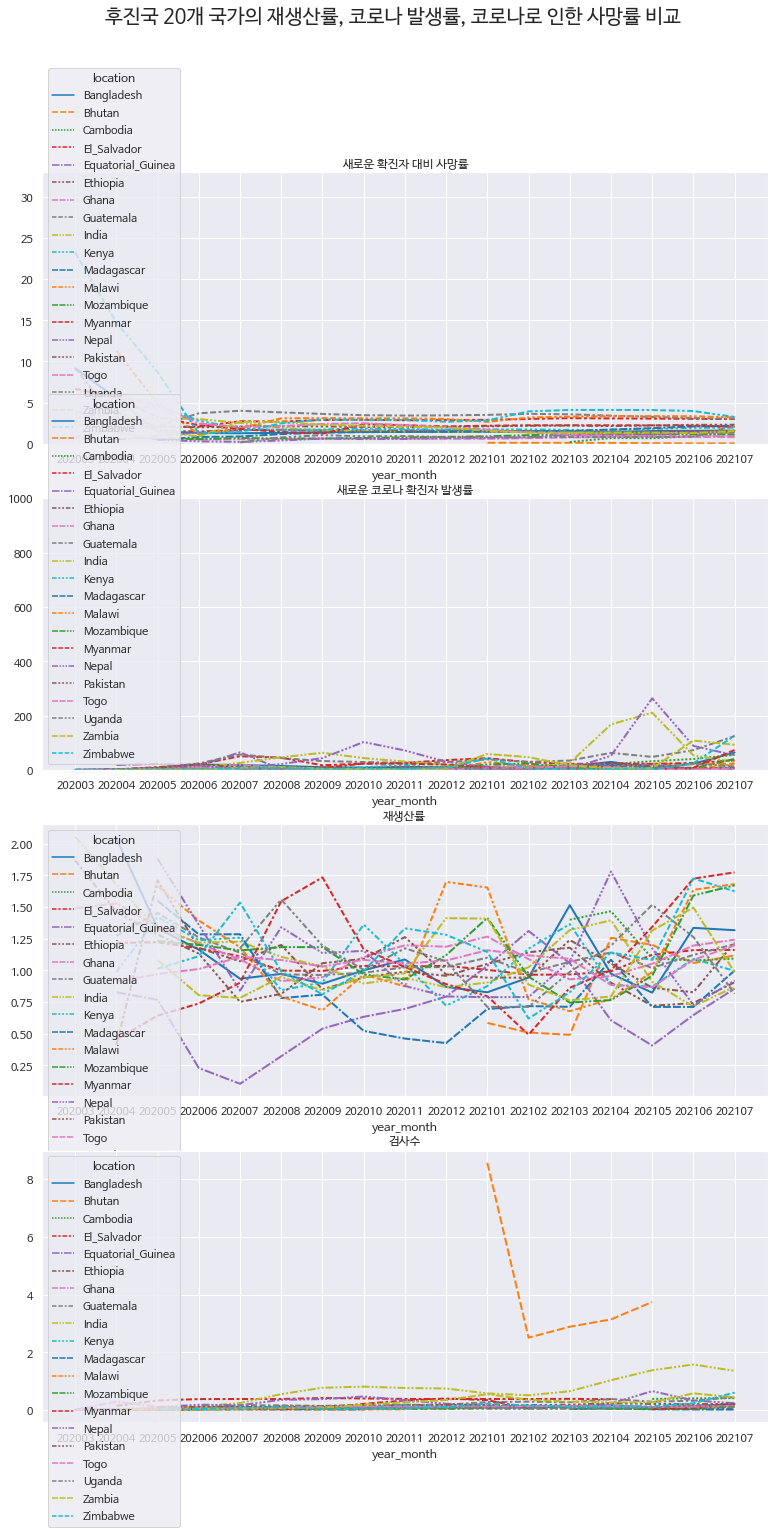

In [25]:
sns.set(rc={'figure.figsize':(13,23)})
plt.rcParams['font.family'] = 'NanumBarunGothic'

pivot_table_a = pd.pivot_table(covid.query("location in @low_HDI_20"), index = "year_month", columns = "location",
                                   values = "reproduction_rate", aggfunc = "mean")
pivot_table_b = pd.pivot_table(covid.query("location in @low_HDI_20"), index = "year_month", columns = "location", 
                                   values = "death_rate", aggfunc = "mean")
pivot_table_c= pd.pivot_table(covid.query("location in @low_HDI_20"), index = "year_month", columns = "location", 
                                   values = "new_cases_per_million", aggfunc = "mean")
pivot_table_d= pd.pivot_table(covid.query("location in @low_HDI_20"), index = "year_month", columns = "location", 
                                   values = "new_tests_per_thousand", aggfunc = "mean")
fig, ax = plt.subplots(4,1)
fig.suptitle('후진국 20개 국가의 재생산률, 코로나 발생률, 코로나로 인한 사망률 비교', size=20)

sns.lineplot(data = pivot_table_b, palette="tab10", linewidth = 2, ax = ax[0]).set_title("새로운 확진자 대비 사망률")
sns.lineplot(data = pivot_table_c, palette="tab10", linewidth = 2, ax = ax[1]).set_title("새로운 코로나 확진자 발생률")
sns.lineplot(data = pivot_table_a, palette="tab10", linewidth = 2, ax = ax[2]).set_title("재생산률")
sns.lineplot(data = pivot_table_d, palette="tab10", linewidth = 2, ax = ax[3]).set_title("검사수")
ax[0].axis(ymin = 0, ymax = 33)
ax[1].axis(ymin = 0, ymax = 1000)
plt.show()

In [26]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

##### 아니 HDI가 낮은 국가들이 선진국보다 사망률이 이렇게 적구, 확진률도 이렇게 적어?...............
##### 뭔가 이상하네요 한번 찾아봐야겠죠?..
##### 우선 검사수가 너무너무너무 적은거를 알 수 있네요 

------------------------------------------------------------

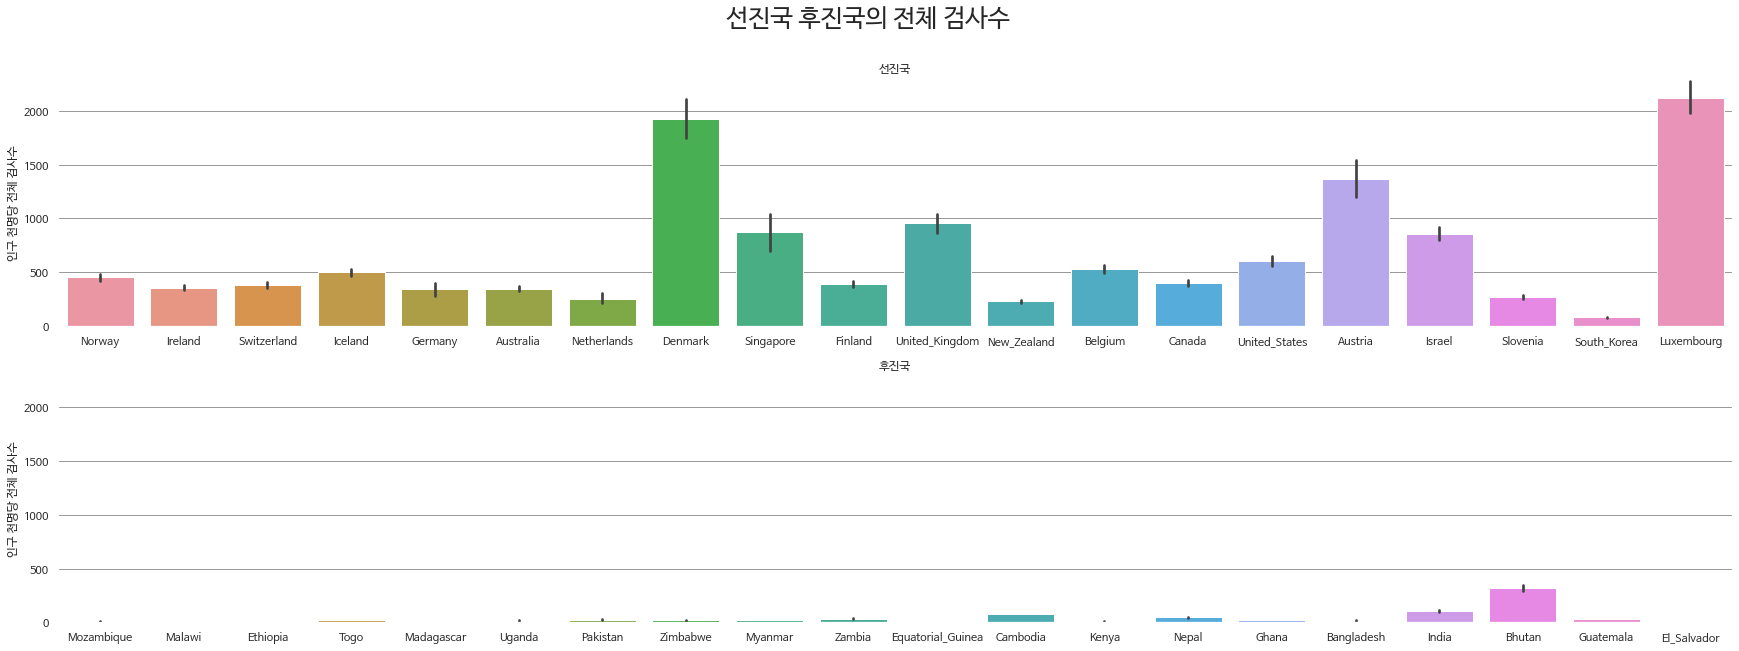

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(30,10))
mydata = [covid.query("location in @high_HDI_20"), covid19.query("location in @low_HDI_20")]
colors = ['r','b']
name = ['선진국','후진국']
for i,ax in enumerate(axes.reshape(-1)): 
 
    sns.barplot(ax=ax, data=mydata[i], x='location', y='total_tests_per_thousand', order = order[i]).set(xlabel='', ylabel = '인구 천명당 전체 검사수')
    ax.set_facecolor('white')
    ax.grid(b=True, color='#999999',axis='y')
    ax.set_title(name[i], loc='center')
    ax.axis(ymin = 0,ymax = 2300)
    
    plt.ylabel('인구 천명당 전체 검사수')

fig.suptitle('선진국 후진국의 전체 검사수', size = 25)
plt.show()

In [28]:
fig.savefig('myplot.png')

##### 당연하다고 할 수 있지만 HDI가 높은 상위 20개 국가는 1000명당 검사수가, 하위 20개 국가에 비해 높게 나타남!!!
##### 그렇다면 검사수가 의미하는 바가 무엇일까?


### HDI 별 positive_rate(연속 7 일 평균으로 COVID 19 검사결과가 양성인 검사의 비율)

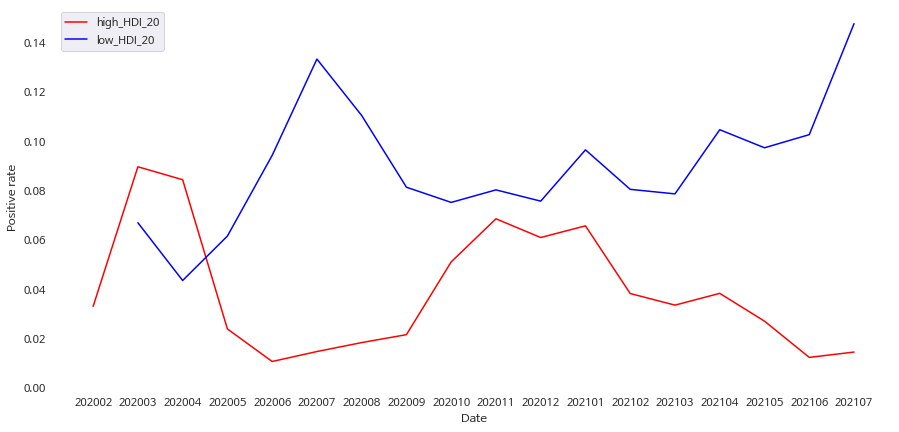

In [29]:
temp = covid.dropna(subset = ['positive_rate'])
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1, 1, 1)
sns.lineplot(ax = ax1, data = temp.query("location in @high_HDI_20").groupby("year_month").mean(),
             color = 'red', 
              linestyle='-', 
            x = 'year_month',
            y = 'positive_rate',
             marker = None,
            label = 'high_HDI_20')
sns.lineplot(ax = ax1, data = temp.query("location in @low_HDI_20").groupby("year_month").mean(),
            x = 'year_month',
            y = 'positive_rate',
             color = 'blue', 
              linestyle='-',
             marker = None,
            label = 'low_HDI_20')
ax.grid(b=True, color='#999999',axis='y')
ax1.axis(ymin = 0)
ax1.set_facecolor('white')
plt.xlabel('Date')
plt.ylabel('Positive rate')
plt.show()

In [30]:
temp.query("location in @high_HDI_20").groupby("year_month").mean()['positive_rate']

year_month
202002   0.03
202003   0.09
202004   0.08
202005   0.02
202006   0.01
202007   0.01
202008   0.02
202009   0.02
202010   0.05
202011   0.07
202012   0.06
202101   0.07
202102   0.04
202103   0.03
202104   0.04
202105   0.03
202106   0.01
202107   0.01
Name: positive_rate, dtype: float64

In [31]:
temp.query("location in @low_HDI_20").groupby("year_month").mean()

,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,total_deaths,total_cases,...,handwashing_facilities,hospital_beds_per_thousand,human_development_index,excess_mortality,2019,2020,2019_num,2020_num,GDP_g_diff,death_rate
year_month,,,,,,,,,,,,,,,,,,,,,
202003,2.19,0.24,0.05,0.01,0.01,1.91,nan,nan,6.49,388.54,...,49.47,0.73,0.61,-15.64,3.00,-2.48,2036.87,1930.96,-5.48,4.02
202004,13.23,0.92,0.36,0.02,0.02,1.35,nan,nan,69.43,2489.57,...,40.65,0.93,0.59,-24.08,2.68,-3.05,1151.98,1095.79,-5.73,4.12
202005,74.16,3.70,1.35,0.06,0.05,1.29,nan,nan,322.85,12842.92,...,42.04,0.92,0.58,-15.00,2.10,-3.76,929.65,885.41,-5.86,2.68
202006,235.68,8.13,4.70,0.20,0.18,1.15,nan,nan,1005.31,40944.56,...,40.92,0.89,0.57,34.85,1.76,-4.00,812.10,773.71,-5.76,1.66
202007,571.50,14.07,12.72,0.32,0.31,1.09,nan,nan,2249.36,100690.60,...,40.60,0.88,0.57,79.96,1.78,-3.95,800.91,763.11,-5.73,1.75
202008,992.23,13.67,22.27,0.30,0.32,1.06,nan,nan,3881.88,205218.28,...,39.76,0.87,0.57,46.63,1.83,-3.80,770.63,734.44,-5.63,1.80
202009,1375.80,12.36,29.94,0.21,0.22,1.00,nan,nan,5943.67,357633.03,...,39.76,0.87,0.57,24.06,1.83,-3.80,770.63,734.44,-5.63,1.84
202010,1807.67,15.67,36.45,0.22,0.22,1.01,nan,nan,7890.88,507273.25,...,39.76,0.87,0.57,14.66,1.83,-3.80,770.63,734.44,-5.63,1.89
202011,2272.21,14.31,43.29,0.23,0.23,1.02,nan,nan,9192.43,611517.66,...,39.76,0.87,0.57,19.18,1.83,-3.80,770.63,734.44,-5.63,1.85


###### 두 집단의 차이는 2020년 09월부터 점차 줄어들다가 2020년 12월 이후 급격한 차이가 발생하며 , 같은 검사 기준으로  두 집단간 코로나 양성률은 2021년 7월 기준 15배 이상의 차이가 있음

즉 비록 두 집단 간 코로나 확진자 발생률이 비슷하다고 하지만 이는 후진국들의 지나치게 낮은 검사율 때문에 확진자들이 제대로 검사되지 않았음을 알 수 있다. 
+++ 심지어 위에서보면 후진국은 검사수가 얼마 늘지도 않았음에도 양성률이 높음
###### ==> 잠재적 코로나 확진자 및 코로나로 인한 사망자들의 존재 가능성 있음!!

###### 이유?
추측 : 코로나 검사 비용 1회에 7만원 + 설비 부족 ==> 낮은 경제성장률을 가진 국가에 부담...

Excess mortality 분석을 통해 확신을 가져보겠습니다.

In [32]:
print("HDI 상위 20개 국가들의 평균 GDP : ", covid.query("location in @high_HDI_20").sort_values(by = ['2019_num'])['2019_num'].unique().mean())
print("HDI 하위 20개 국가들의 평균 GDP : ", covid.query("location in @low_HDI_20").sort_values(by = ['2019_num'])['2019_num'].unique().mean())

HDI 상위 20개 국가들의 평균 GDP :  2027.2235
HDI 하위 20개 국가들의 평균 GDP :  660.56385


HDI 차이가 있는 나라들은 GDP도 약 3배정도의 차이를 보임

In [33]:
print("HDI 상위 20개 국가들의 평균 excess_mortality : ", covid.query("location in @high_HDI_20").sort_values(by = ['excess_mortality'])['excess_mortality'].mean())
print("HDI 하위 20개 국가들의 평균 excess_mortality : ", covid.query("location in @low_HDI_20").sort_values(by = ['excess_mortality'])['excess_mortality'].mean())

HDI 상위 20개 국가들의 평균 excess_mortality :  8.657424999999995
HDI 하위 20개 국가들의 평균 excess_mortality :  19.2563829787234


excess_mortaliyt가 약 2.3배 정도의 차이를 보임

###### high_HDI 국가들과 low_HDI 국가들의 excess_mortality를 보았을 때 2배차이, gdp는 3배 차이가 남 
-----------------------------------------------------------------------------------------------

###### 날이 가면 갈수록 검사수가 줄어든다 사망률이 줄어들고 있는 선진국은 그럴 수 있는데, 사망률이 늘고있는 후진국도?!

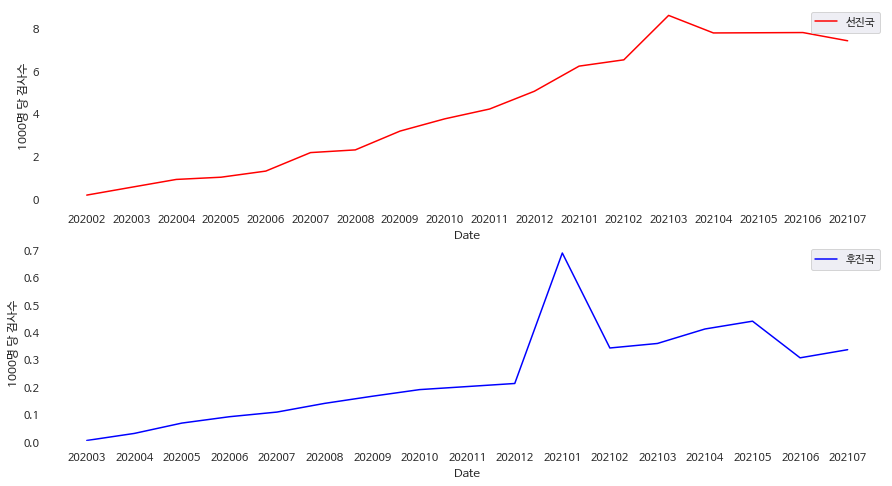

In [34]:
temp = covid.dropna(subset = ['positive_rate'])
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

sns.lineplot(ax = ax1, data = covid.query("location in @high_HDI_20").groupby("year_month").mean(),
            x = 'year_month',
            y = 'new_tests_per_thousand',
                         color = 'red',
            label = '선진국').set(xlabel = 'Date',
             ylabel = '1000명 당 검사수'
            )
sns.lineplot(ax = ax2, data = covid.query("location in @low_HDI_20").groupby("year_month").mean(),
            x = 'year_month',
            y = 'new_tests_per_thousand',
                         color = 'blue',
            label = '후진국')
ax2.axis(ymin = 0)
ax1.set_facecolor('white')
ax2.set_facecolor('white')
plt.xlabel('Date')
plt.ylabel('1000명 당 검사수')
plt.show()

후진국의 검사수는 선진국에 비해 매우 적은데 그에 더해 가면 갈수록 검사받는 비율이 줄고 있음을 확인할 수 있다.

-----------------------------------------------------------------
## 인사이트
앞서서 HDI_low_20 그룹을 통칭 후진국이라고 하겠다.
###### 후진국들의 감소하는 검사수에 비해 증가하는 positive_rate는 아직 검사되지 않은 확진자들이 있음을 의미
양성률은 양성인 검사수를 전체 검사수로 나눈 비율으로서 감염률이랑은 조금 다릅니다. 예를들어 양성률이 1퍼라고 나왔다고 해서 전체 인구수 중 1퍼센트의 사람들이 감염되었다고 말할 수 없는 것이 코로나 검사는 보통 감염의심자들이 받기 때문입니다. 예를 들어 우리나라의 경우 2020년 2월 기준 평균 양성율이 휴일이 1.46퍼 평일이 0.94퍼 정도로 훨씬 높습니다. 그렇다고 해서 주말에는 감염자 수가 늘어난다라고 해석할 수는 없습니다. 심지어 주말이 평일에 비해 검사수가 훨씬 적다는 것을 감안하면 더 확실해집니다. 종합하자면 코로나 증상이 있는사람들이 검사를 받기 때문에 전체 검사수가 적을수록 양성률이 높아짐을 알 수있습니다.  
따라서 양성률이 높다는 것을 확진자들 중 검사가 이루어지지 않은 사람들이 많다는 것으로 해석 하였습니다.

# VAR 모델을 통해 시계열 상관관계 분석

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from statsmodels.tools.eval_measures import rmse, aic
import pickle
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

## 미국을 기준으로 전처리 진행
다른 나라의 경우 하단의 United_States 대신 해당 국가명 적으면 됨

In [36]:
mydata = United_States[['new_cases_per_million', 'new_deaths_per_million','new_vaccinations_smoothed_per_million', 'stringency_index']]

In [37]:
mydata

,new_cases_per_million,new_deaths_per_million,new_vaccinations_smoothed_per_million,stringency_index
73986,nan,nan,nan,0.00
73987,0.00,nan,nan,0.00
73988,0.00,nan,nan,0.00
73989,0.00,nan,nan,0.00
73990,0.01,nan,nan,0.00
...,...,...,...,...
74525,96.21,1.00,1639.00,nan
74526,85.84,0.85,1584.00,nan
74527,239.60,1.18,1554.00,nan
74528,39.15,0.21,1569.00,nan


In [38]:
mydata.index = United_States['date']
mydata = mydata[['new_vaccinations_smoothed_per_million', 'new_cases_per_million']]
mydata = mydata.dropna(subset = ['new_cases_per_million'])
mydata = mydata.query("date > 20200801")
mydata = mydata.fillna(0)

In [39]:
mydata

,new_vaccinations_smoothed_per_million,new_cases_per_million
date,,
2020-08-02,0.00,137.67
2020-08-03,0.00,137.46
2020-08-04,0.00,177.56
2020-08-05,0.00,164.55
2020-08-06,0.00,179.30
...,...,...
2021-07-14,1639.00,96.21
2021-07-15,1584.00,85.84
2021-07-16,1554.00,239.60


### 그래프 모양 확인

<AxesSubplot:xlabel='date'>

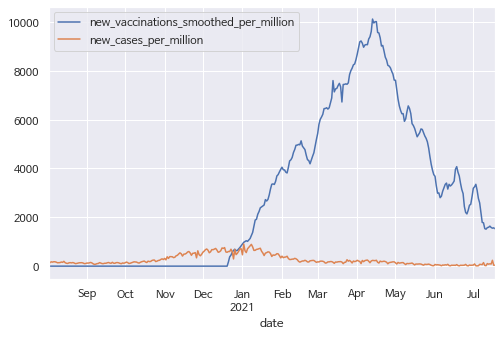

In [40]:
mydata.plot(figsize = (8,5))

## 비정상성 차수 추론
###### adf테스트로 추세확인 후 1차 차분

In [41]:
# 비정상성 차수 추론
# adf테스트로 추세확인 후 1차 차분
target = mydata.new_vaccinations_smoothed_per_million.copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
Y1_integ_order = 0
if integ_result[1] > 0.1:
    Y1_integ_order = Y1_integ_order + 1
target = mydata.new_cases_per_million.copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
Y2_integ_order = 0
if integ_result[1] > 0.1:
    Y2_integ_order = Y2_integ_order + 1
print('Y1_order: ', Y1_integ_order, 'Y2_order: ', Y2_integ_order)

Y1_order:  1 Y2_order:  1


#### 차분전

In [42]:
adfuller_test = adfuller(mydata['new_vaccinations_smoothed_per_million'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
adfuller_test = adfuller(mydata['new_cases_per_million'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -1.5369757501886032
p-value: 0.5151471718032365
ADF test statistic: -1.3119919507281255
p-value: 0.623668279808319


#### 차분 후

In [43]:
mydata_diff = mydata.diff(4).dropna()

In [44]:
adfuller_test = adfuller(mydata_diff['new_vaccinations_smoothed_per_million'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
adfuller_test = adfuller(mydata_diff['new_cases_per_million'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -2.8551915643522094
p-value: 0.050812242157078476
ADF test statistic: -4.067763389511523
p-value: 0.0010944244738697812


<AxesSubplot:xlabel='date'>

C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


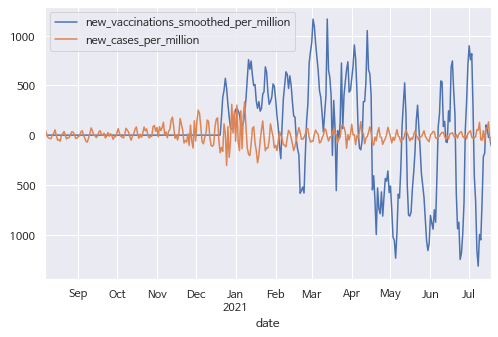

In [45]:
#모양 확인
mydata_diff.plot(figsize = (8,5))

## Granger Causality 테스트

In [46]:
# Granger Causality 테스트
print('\n[백신 -> 확진자]') 
granger_result1 = sm.tsa.stattools.grangercausalitytests(mydata.diff(4).dropna().values, maxlag=115, verbose=True)
print('\n[확진자 -> 백신]') 
granger_result2 = sm.tsa.stattools.grangercausalitytests(mydata.diff(4).dropna().iloc[:,[1,0]].values, maxlag=115, verbose=True)


[백신 -> 확진자]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0050  , p=0.9438  , df_denom=343, df_num=1
ssr based chi2 test:   chi2=0.0050  , p=0.9436  , df=1
likelihood ratio test: chi2=0.0050  , p=0.9436  , df=1
parameter F test:         F=0.0050  , p=0.9438  , df_denom=343, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6901  , p=0.5022  , df_denom=340, df_num=2
ssr based chi2 test:   chi2=1.4005  , p=0.4965  , df=2
likelihood ratio test: chi2=1.3976  , p=0.4972  , df=2
parameter F test:         F=0.6901  , p=0.5022  , df_denom=340, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3305  , p=0.8033  , df_denom=337, df_num=3
ssr based chi2 test:   chi2=1.0121  , p=0.7983  , df=3
likelihood ratio test: chi2=1.0107  , p=0.7987  , df=3
parameter F test:         F=0.3305  , p=0.8033  , df_denom=337, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4789 

number of lags (no zero) 34
ssr based F test:         F=0.6735  , p=0.9167  , df_denom=244, df_num=34
ssr based chi2 test:   chi2=29.3736 , p=0.6939  , df=34
likelihood ratio test: chi2=28.0759 , p=0.7526  , df=34
parameter F test:         F=0.6735  , p=0.9167  , df_denom=244, df_num=34

Granger Causality
number of lags (no zero) 35
ssr based F test:         F=0.6437  , p=0.9408  , df_denom=241, df_num=35
ssr based chi2 test:   chi2=29.1665 , p=0.7451  , df=35
likelihood ratio test: chi2=27.8826 , p=0.7982  , df=35
parameter F test:         F=0.6437  , p=0.9408  , df_denom=241, df_num=35

Granger Causality
number of lags (no zero) 36
ssr based F test:         F=0.6434  , p=0.9435  , df_denom=238, df_num=36
ssr based chi2 test:   chi2=30.2662 , p=0.7375  , df=36
likelihood ratio test: chi2=28.8825 , p=0.7943  , df=36
parameter F test:         F=0.6434  , p=0.9435  , df_denom=238, df_num=36

Granger Causality
number of lags (no zero) 37
ssr based F test:         F=0.6469  , p=0.9437  , d

ssr based F test:         F=1.2911  , p=0.1032  , df_denom=142, df_num=68
ssr based chi2 test:   chi2=172.4938, p=0.0000  , df=68
likelihood ratio test: chi2=134.2966, p=0.0000  , df=68
parameter F test:         F=1.2911  , p=0.1032  , df_denom=142, df_num=68

Granger Causality
number of lags (no zero) 69
ssr based F test:         F=1.2667  , p=0.1210  , df_denom=139, df_num=69
ssr based chi2 test:   chi2=174.8101, p=0.0000  , df=69
likelihood ratio test: chi2=135.6228, p=0.0000  , df=69
parameter F test:         F=1.2667  , p=0.1210  , df_denom=139, df_num=69

Granger Causality
number of lags (no zero) 70
ssr based F test:         F=1.2705  , p=0.1183  , df_denom=136, df_num=70
ssr based chi2 test:   chi2=181.1398, p=0.0000  , df=70
likelihood ratio test: chi2=139.3745, p=0.0000  , df=70
parameter F test:         F=1.2705  , p=0.1183  , df_denom=136, df_num=70

Granger Causality
number of lags (no zero) 71
ssr based F test:         F=1.2523  , p=0.1331  , df_denom=133, df_num=71
ssr b

likelihood ratio test: chi2=389.7527, p=0.0000  , df=98
parameter F test:         F=2.0078  , p=0.0033  , df_denom=52, df_num=98

Granger Causality
number of lags (no zero) 99
ssr based F test:         F=1.9320  , p=0.0059  , df_denom=49, df_num=99
ssr based chi2 test:   chi2=968.0528, p=0.0000  , df=99
likelihood ratio test: chi2=394.3043, p=0.0000  , df=99
parameter F test:         F=1.9320  , p=0.0059  , df_denom=49, df_num=99

Granger Causality
number of lags (no zero) 100
ssr based F test:         F=1.7755  , p=0.0158  , df_denom=46, df_num=100
ssr based chi2 test:   chi2=953.3484, p=0.0000  , df=100
likelihood ratio test: chi2=390.5018, p=0.0000  , df=100
parameter F test:         F=1.7755  , p=0.0158  , df_denom=46, df_num=100

Granger Causality
number of lags (no zero) 101
ssr based F test:         F=1.8430  , p=0.0131  , df_denom=43, df_num=101
ssr based chi2 test:   chi2=1064.8895, p=0.0000  , df=101
likelihood ratio test: chi2=411.5899, p=0.0000  , df=101
parameter F test:  

parameter F test:         F=0.2506  , p=0.9999  , df_denom=277, df_num=23

Granger Causality
number of lags (no zero) 24
ssr based F test:         F=0.2553  , p=0.9999  , df_denom=274, df_num=24
ssr based chi2 test:   chi2=7.2224  , p=0.9996  , df=24
likelihood ratio test: chi2=7.1428  , p=0.9997  , df=24
parameter F test:         F=0.2553  , p=0.9999  , df_denom=274, df_num=24

Granger Causality
number of lags (no zero) 25
ssr based F test:         F=0.2882  , p=0.9997  , df_denom=271, df_num=25
ssr based chi2 test:   chi2=8.5596  , p=0.9991  , df=25
likelihood ratio test: chi2=8.4478  , p=0.9992  , df=25
parameter F test:         F=0.2882  , p=0.9997  , df_denom=271, df_num=25

Granger Causality
number of lags (no zero) 26
ssr based F test:         F=0.2699  , p=0.9999  , df_denom=268, df_num=26
ssr based chi2 test:   chi2=8.4038  , p=0.9996  , df=26
likelihood ratio test: chi2=8.2957  , p=0.9996  , df=26
parameter F test:         F=0.2699  , p=0.9999  , df_denom=268, df_num=26

Gran

likelihood ratio test: chi2=24.3325 , p=1.0000  , df=63
parameter F test:         F=0.2229  , p=1.0000  , df_denom=157, df_num=63

Granger Causality
number of lags (no zero) 64
ssr based F test:         F=0.2213  , p=1.0000  , df_denom=154, df_num=64
ssr based chi2 test:   chi2=26.0278 , p=1.0000  , df=64
likelihood ratio test: chi2=24.8996 , p=1.0000  , df=64
parameter F test:         F=0.2213  , p=1.0000  , df_denom=154, df_num=64

Granger Causality
number of lags (no zero) 65
ssr based F test:         F=0.2122  , p=1.0000  , df_denom=151, df_num=65
ssr based chi2 test:   chi2=25.7557 , p=1.0000  , df=65
likelihood ratio test: chi2=24.6466 , p=1.0000  , df=65
parameter F test:         F=0.2122  , p=1.0000  , df_denom=151, df_num=65

Granger Causality
number of lags (no zero) 66
ssr based F test:         F=0.2099  , p=1.0000  , df_denom=148, df_num=66
ssr based chi2 test:   chi2=26.3038 , p=1.0000  , df=66
likelihood ratio test: chi2=25.1444 , p=1.0000  , df=66
parameter F test:      

ssr based F test:         F=0.2773  , p=1.0000  , df_denom=61, df_num=95
ssr based chi2 test:   chi2=108.8131, p=0.1574  , df=95
likelihood ratio test: chi2=90.4506 , p=0.6129  , df=95
parameter F test:         F=0.2773  , p=1.0000  , df_denom=61, df_num=95

Granger Causality
number of lags (no zero) 96
ssr based F test:         F=0.2604  , p=1.0000  , df_denom=58, df_num=96
ssr based chi2 test:   chi2=108.1751, p=0.1863  , df=96
likelihood ratio test: chi2=89.9477 , p=0.6547  , df=96
parameter F test:         F=0.2604  , p=1.0000  , df_denom=58, df_num=96

Granger Causality
number of lags (no zero) 97
ssr based F test:         F=0.2624  , p=1.0000  , df_denom=55, df_num=97
ssr based chi2 test:   chi2=115.6911, p=0.0948  , df=97
likelihood ratio test: chi2=95.0820 , p=0.5361  , df=97
parameter F test:         F=0.2624  , p=1.0000  , df_denom=55, df_num=97

Granger Causality
number of lags (no zero) 98
ssr based F test:         F=0.2665  , p=1.0000  , df_denom=52, df_num=98
ssr based ch

## 해석
상기 결과로 부터 확진자가 백신에 주는 영향은 없지만 백신이 확진자에 주는 영향은 존재
lag 89부터 존재